# Project Business Statistics: E-news Express

## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

### Import all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/abtest.csv')

## Exploratory Data Analysis

### Data Overview

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### Displaying the first few rows of the dataset

In [ ]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


There are 6 variables (columns) in the sample data representing the user ID, group, landing page, time spent on the page, conversion status and language preferred.

#### Displaying the last few rows of the dataset

In [ ]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


#### Checking the shape of the dataset

In [ ]:
df.shape

(100, 6)

The dataset contains 6 variables of 100 data points from 100 users (100 rows and 6 cloumns).

#### Checking the data types of the columns for the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


The data type of the columns are integer, float and strings(object). In other words, the data type of the columns are continous and discrete in nature.

#### Getting the statistical summary for the numerical variables

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


1. From the sample, on an average, the time spent on the page is 5.4 minutes per day.
2. The median time spent on the page (5.4 minutes) is approximately equal to the average, which suggests that the data is not skewed, but normally distributed.
3. The minimum and maximum time spent on the page ranges from 0.19 to 10.71 minutes. This shows that some users spend a significant amount of time on the web page.
4. The time spent on the page is 2.378 standard deviation away from the median, which accounts for why the 25th percentile is 3.88, and the 75th percentile is 7.02 with median equal to 5.415

#### Getting the statistical summary for the categorical variables

In [ ]:
df.astype("object").describe()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100,100,100,100.00,100,100
unique,100,2,2,94.00,2,3
top,546592,control,old,6.04,yes,Spanish
freq,1,50,50,2.00,54,34


1. There are 100 users sampled on the webpage.
2. 100 users were shared equally into 2 groups (control and treatment).
3. 3 languages (English, French and Spanish) were used alternatively by users as preferred.
4. There are 2 landing pages (old and new).

### Check for missing values

In [ ]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There are no missing values in the dataset

### Check for duplicates

In [ ]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

There are no duplicates in the dataset

### Univariate Analysis

#### Time spent on the page

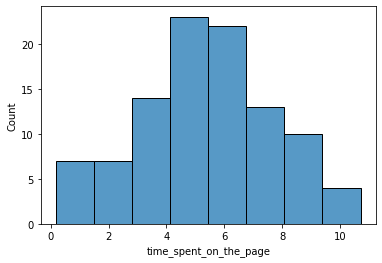

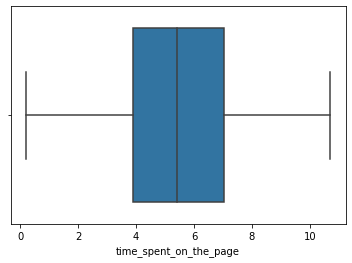

In [ ]:
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

1. The time spent on the page follows an almost normal distribution (median approximately equal to mean).
2. Time spent on the page ranges between 0.19 seconds to 10.71 miniutes
3. The median time spent on the page is 5.415
4. There are no outliers
5. Q1= 3.88, Q2=4.02


#### Group

In [ ]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

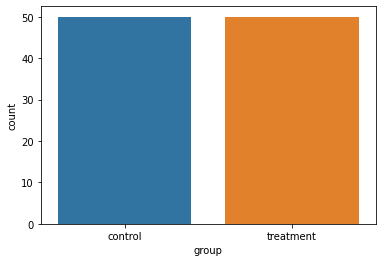

In [ ]:
sns.countplot(data=df,x='group')
plt.show()

1. There are two groups (control and treatment) with equal number of users.
2. Each group has 50 users each.

#### Landing page

In [ ]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

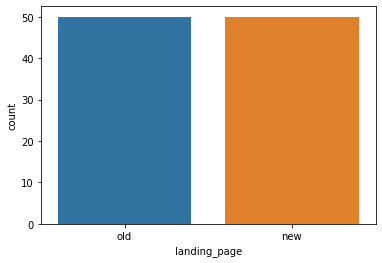

In [ ]:
sns.countplot(data=df,x='landing_page')
plt.show()

1. There are two landing pages (old and new) designated for the use of the two groups, control and treatment.
2. Each landing page is being used by equal amount of users each (50 users each).

#### Converted

In [ ]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

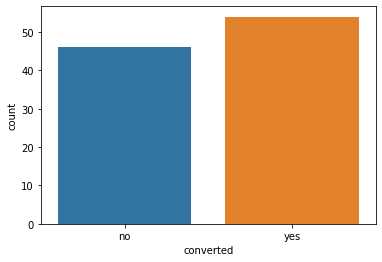

In [ ]:
sns.countplot(data=df,x='converted')
plt.show()

1. 54 users converted after spending time on the web page.
2. 46 users were not converted after spending time on the web page.

#### Language preferred

In [ ]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

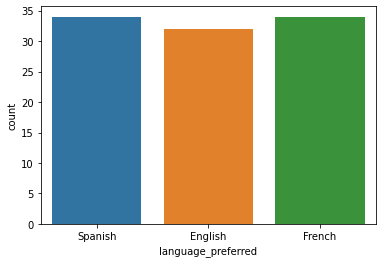

In [ ]:
sns.countplot(data=df,x='language_preferred')
plt.show()

1. There are 3 preferred languages
2. 34 users prefer Spanish language
3. 34 users prefer  French language
4. 32 users prefer Engliah langusge
5. The users are a bit more of French and Spanish users

### Bivariate Analysis

#### Landing page vs Time spent on the page

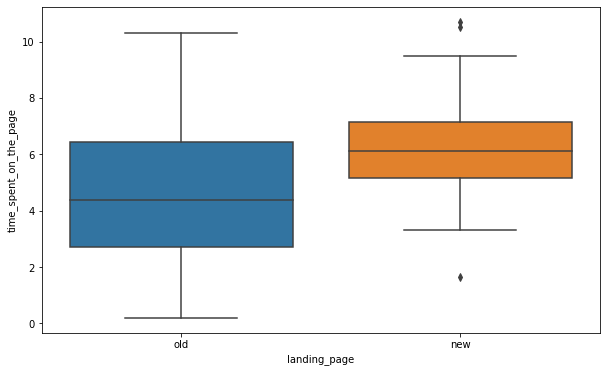

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

1. Users spend longer time on the new landing page (1.15 minutes to 10.71 minutes) compared to the old landing page(0.19 minutes to 10.20 minutes).
2. There are presence of outliers on the distribution of time spent on the new landing page.

#### Conversion status vs Time spent on the page

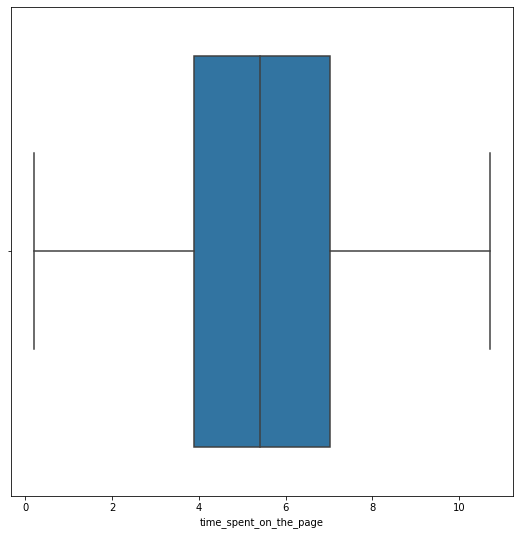

In [ ]:
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'time_spent_on_the_page', hue = 'converted')
plt.show()


1. The boxplot is normally distributed
2. The users of the new landing page spent more time on the page and had a higher conversion rate or status.
3. Users spent a range of 0.15 to 10.71 minutes on the page.
4. The distribution does not contain outliers.

#### Language preferred vs Time spent on the page

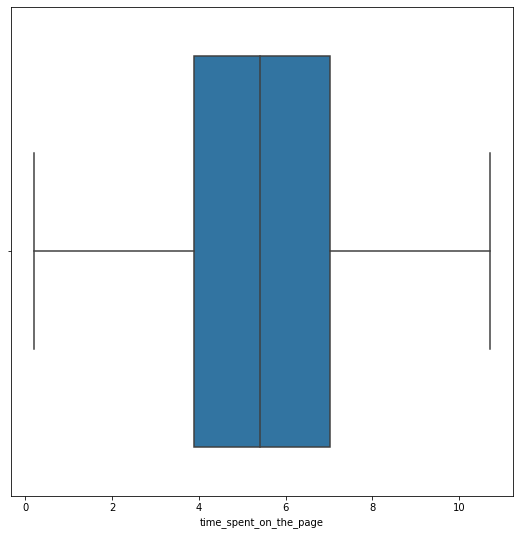

In [ ]:
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'time_spent_on_the_page', hue = 'language_preferred')
plt.show()

1. The boxplot is normally distributed.
2. Language preferred did not influence the time spent on the page by users.
3. Users spent a range of 0.15 to 10.71 minutes on the page.
4. The distribution does not contain outliers.

### Visual Analysis

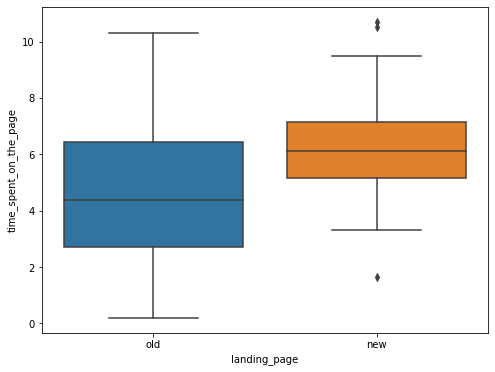

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

1. Presence of outliers in the distribution of the time spent on the new landing page.
2. Users spend longer time on the new landing page ( minimum of 1.15 minutes to  a maximum of 10.71 minutes) compared to the old landing page( minimum of 0.19 minutes to a maximum of 10.20 minutes).
3. The interquartile range of the new landing page is conspicously higher than that of the old landing page.
3. The distribution of the time spent on the old and new landing page is slightly skewed to the right.

### Null and alternate hypotheses

$H_0$: Users spend equal mean time on the new landing page and the existing landing page.

$H_a$: Users spend more (greater) mean time on the new landing page than the existing landing page



Let μ1 and μ2 the time spent on the new landing page and the existing landing page respectively.
Mathematically, the above formulated hypothesis can be written as.
1. $H_0$: μ1 = μ2
2. $H_a$: μ1 > μ2

### Appropriate test

The appropriate test is a two independent sample T-test for equality of means

 $\alpha = 0.05$.

### Collection and preparation of data

In [ ]:
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [ ]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


### P-value

In [ ]:
from scipy.stats import ttest_ind

test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater') 

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Inference

Since the p-value (~0.00014) is much less than the level of significance, we reject the null hypothesis. Hence we have enough significance to conclude that the mean time spent on the new landing page is greater than the mean time spent on the existing landing page.



### Visual Analysis

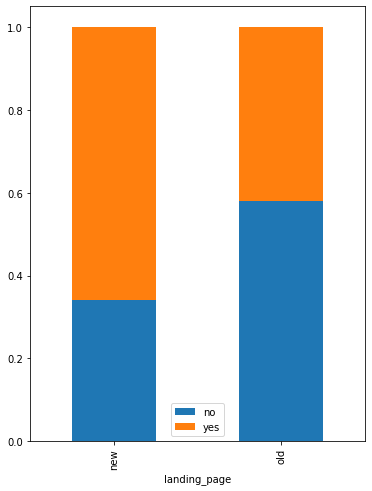

In [ ]:
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

1. Approximately 34% of users on the new landing page did not convert, while 66% of users converted.
2. Approximately 58% of users on the old landing page did not covert, while approximately 42% of users converted.

$H_0$: The conversion rate of the new landing page is equal to the conversion rate of the old landing page.

$H_a$: The conversion rate of the new landing page is greater the conversion rate of the old landing page.

Let μ1 and μ2 be the conversion rate for the new and the old page respectively; The mathematical representation is given below;

1. $H_0:$ μ1 = μ2

2. $H_a:$ μ1 > μ2



### Appropriate test

The appropriate test is a two proportion Z-test

 α = 0.05.

In [ ]:
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']

old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes'] 

n_control = df.group.value_counts()['control']
n_treatment = df.group.value_counts()['treatment'] 

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


### P-value

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative = 'larger')   #complete the code by filling appropriate parameters in the blanks


print('The p-value is', p_value)

The p-value is 0.008026308204056278


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Inference

As the P-value (~0.008) is less than the level of significance, we reject the null hypotheses. Hence, we have enough significance to conclude that the conversion rate of the new landing page is greater than the conversion rate of the old landing page.



### Visual Analysis

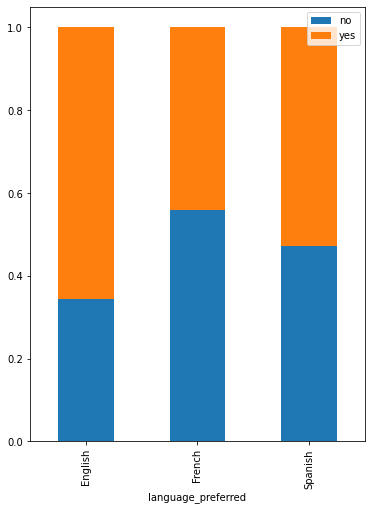

In [ ]:
pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()


1. Approximately 36% of English users did not convert, while about 64% of English users converted.
2. About 57% of French users did not convert, while about 43% converted.
3. About 49% of Spanish users did not convert, while approximately 51% of Spanish users converted.

Let μ1 and μ2 be the coversion status and preferred language of users respectively. Mathematically represented below;

1. $H_0:$ : Conversion status is independent of preferred language.

2. $H_a:$ : Conversion status depends on preferred language.



### Appropriate test

The appropriate test is a Chi-square test of independence.

### The significance level

As given in the problem statement, we select α = 0.05.

### Data Collection and preparation

In [ ]:
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])  

contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### P-value

In [ ]:

from scipy.stats import chi2_contingency

chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)  
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Inference

As the P-value (~0.213) is greater than the level of significance, we will fail to reject the null hypotheses. Hence, we have enough significance to conclude that the conversion status is independent of preferred language.



### Visual Analysis

In [ ]:
df_new = df[df['landing_page'] == 'new']

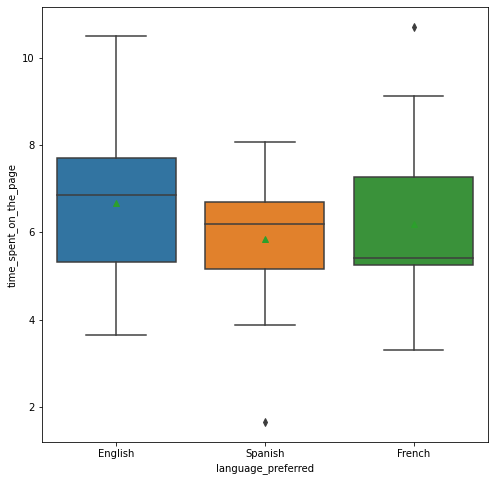

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()


1. The distribution contains some outliers for Spanish and French users
2. The distribution of French preferred users is right skewed
3. The distribution of Spanish preferred users is left skewed
4. The distribution of English preferred users is left skewed
5. Spanish preferred users spent the lowest time (0.19 minutes) on the page
6. French preferred users spent the highest amount of time (10.71 minutes) on the page.
7. The distribution of the English preferred users contains no outliers. 

In [ ]:
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()


language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Null and alternate hypotheses

1. $H_0:$ The time spent on the new page for different languages are equal

2. $H_a:$  The time spent on the new page for different languages are not equal





### Appropriate test

The appropriate test is a one-way ANOVA F-test

### Decide the significance level

As given in the problem statement, we select α = 0.05.

### Collect and prepare data

In [ ]:
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']

time_spent_French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page'] 
time_spent_Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']   

### P-value

In [ ]:
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish) 

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Inference

As the P-value (~0.432) is greater than the level of significance, we will fail to reject the null hypotheses. Hence, we have enough significance to conclude that the time spent on the new page is the same for different language users.

## Conclusion and Business Recommendations


Conclusion
1. Users spend more time on the new landing page than on the existing landing page.

2. The conversion rate (the proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page.

3. The converted status is independent on the preferred language.

4. The time spent on the new page is the same for the different language users.


Recommendations
1. E-News should discard the old landing page and activate the new landing page.


___